# Summary:
In this Jupyter Notebook project, we will delve into the world of feature engineering, with a specific focus on wrapper methods for feature selection. Wrapper methods are a family of algorithms that select features by systematically evaluating a machine learning model's performance on different subsets of features. Unlike filter methods, wrapper methods assess features based on their performance with a specific model, providing a more tailored approach to feature selection. We will explore and implement five distinct wrapper methods to optimize feature selection for improved model performance.

This lesson will explain five different wrapper methods:

* Sequential forward selection
* Sequential backward selection
* Sequential forward floating selection
* Sequential backward floating selection
* Recursive feature elimination

### Dataset:
We will work with a health dataset loaded from a CSV file named __dataR2.csv__.The data was taken from the  __UCI Machine Learning Repository__ [https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra]. This dataset includes features such as Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1, and Classification.

In [2]:
import pandas as pd
# Load the data
health = pd.read_csv("data/dataR2.csv")

In [4]:
health.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


# Setting Up a Logistic Regression Model

As a practical component of the project, we will set up a logistic regression model to evaluate the performance of each wrapper method in optimizing feature selection. Logistic regression is a well-suited model for binary classification problems.

In [6]:
# Split independent and dependent variables
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

In [7]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [8]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64

Logistic regression is a statistical and machine learning technique used for binary and multi-class classification problems. It's a fundamental algorithm that's particularly useful for situations where you want to predict the probability of an event happening or assigning an observation to a specific category or class based on the values of one or more predictor variables (features). The default probability threshold for many binary classification tasks, including logistic regression, is typically set at 0.5.

The accuracy of a logistic regression model is the percentage of correct predictions that it makes on a testing set. In scikit-learn, you can check the accuracy of a model with the .score() method.

In [10]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

# Fit the model
lr.fit(X,y)
# Print the accuracy of the model
print(lr.score(X,y))

0.8017241379310345


# Sequential Forward Selection

Sequential Forward Selection (SFS) is a wrapper method used to build an optimal feature set by iteratively adding features to the model. It begins with an empty feature set and incrementally includes one feature at a time until a predefined number of features is reached or model performance is optimized.

Let's consider an example using your dataset with the following features: Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, and MCP.1.

* __Initial Step:__

The algorithm starts by training and testing a model with each individual feature in isolation. It evaluates the performance of the model using only one feature at a time.
Feature Selection Process:

In each subsequent step, the algorithm assesses the model's performance for all possible feature additions to the current subset. It selects the feature that provides the most significant improvement in model performance.
* __Iteration 1:__

The algorithm begins with the best-performing single feature (e.g., "Glucose" if it offers the best performance). It then tests the model's performance using various combinations of the next feature to add, such as {Glucose, BMI}, {Glucose, HOMA}, and so on.
* __Iteration 2:__

The feature that enhances the model the most is added to the subset. For example, if {Glucose, BMI} performs best, the algorithm proceeds to the next iteration by considering the remaining features with this subset: {Glucose, BMI, Insulin}, {Glucose, BMI, Leptin}, and others.

* __Iteration 3:__

This process continues until you reach the desired number of features or until further additions don't improve the model's performance significantly. The algorithm stops when you have the optimal feature set that maximizes the model's predictive power.

Sequential Forward Selection is a greedy algorithm. Instead of examining all possible feature subsets exhaustively, it selects the feature that offers the best immediate performance gain at each step. This approach helps identify a subset of features that work well together for your specific modeling task and dataset, potentially enhancing model accuracy and efficiency.

In [14]:
 from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [15]:
# Set up SFS parameters
sfs = SFS(lr,
           k_features=3, # number of features to select
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=0)

__lr:__

This refers to the machine learning model you want to use for Sequential Forward Selection. In my case, I've specified lr, which suggests that I am using a logistic regression model (lr typically stands for logistic regression).

__k_features:__

This parameter defines the number of features you want to select. In your example, you've set it to 3, indicating that you want to select the top 3 features based on the performance criterion you specify.

__forward:__

This parameter is a boolean (True or False) and controls whether you are using forward selection. In your case, you've set it to True, which means you are using Sequential Forward Selection. This approach starts with an empty feature set and adds features one at a time.

__floating:__

This is another boolean parameter that determines whether you are using floating selection. In your example, you've set it to False, which means you are not using floating selection. Floating selection allows features to be added or removed during the selection process, but you've chosen to keep it simple with only forward selection.
scoring:

This parameter specifies the performance metric used to evaluate the feature subsets at each step. In your case, you've set it to 'accuracy', indicating that you want to evaluate feature subsets based on their impact on classification accuracy.

__cv:__

This parameter stands for cross-validation. It defines the number of cross-validation folds to use when evaluating feature subsets. In your code, you've set it to 0, which could be considered as performing feature selection without cross-validation. In practice, cross-validation is often used to get a more robust estimate of model performance, and you might want to set this to a value such as 5 or 10 for a typical 5-fold or 10-fold cross-validation.
By setting up these parameters, you are configuring the behavior of the Sequential Forward Selection algorithm for your specific use case, including the choice of model (logistic regression), the number of features to select (3), and the evaluation metric (accuracy).

In [16]:
# Fit the equential forward selection model
sfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(3, 3), scoring='accuracy')

# Evaluating the Result of Sequential Forward Selection

In [18]:
sfs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.72413793]),
  'avg_score': 0.7241379310344828,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.73275862]),
  'avg_score': 0.7327586206896551,
  'feature_names': ('Age', 'Glucose')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.76724138]),
  'avg_score': 0.7672413793103449,
  'feature_names': ('Age', 'Glucose', 'Insulin')}}

In [19]:
# Print the chosen feature names
print(sfs.subsets_[3]["feature_names"])

('Age', 'Glucose', 'Insulin')


In [20]:
# Print the accuracy of the model after sequential forward selection
print(sfs.subsets_[3]['avg_score'])

0.7672413793103449


C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


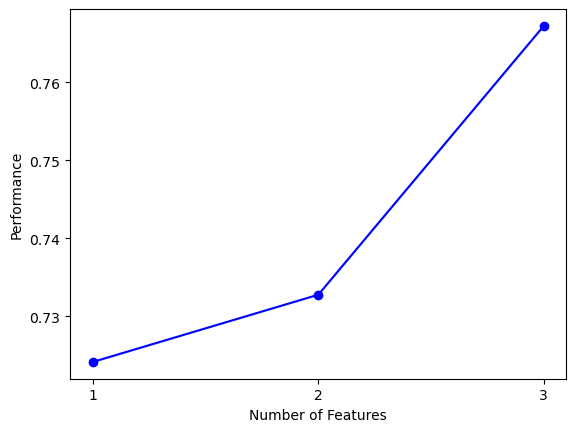

In [21]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()

# Sequential Backward Selection with mlxtend

Sequential backward selection is the reverse of forward selection. It begins with all features and iteratively removes the least important features based on model performance.

This technique helps identify features that have the least impact on model accuracy, streamlining the feature set.

In [43]:
# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)

To implement sequential backward selection in mlxtend you can use the same SFS class you used for sequential forward selection. The only difference is that you have to set the parameter forward to False.

In [44]:
# Fit sbs to X and y
sbs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(3, 3), scoring='accuracy')

# Evaluating the Result of Sequential Backward Selection

In [45]:
sbs.subsets_

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin',
   'MCP.1')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Resistin')},
 6: {'feature_idx': (0, 1, 2, 3, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')},
 5: {'feature_idx': (0, 1, 2, 3, 7),
  'cv_scores': array([0.79310345]),
  'avg_score': 0.79

In [46]:
# Print the chosen feature names
print(sbs.subsets_[3]["feature_names"])

('Age', 'Glucose', 'Resistin')


In [47]:
# Print the accuracy of the model after sequential forward selection
print(sbs.subsets_[3]['avg_score'])

0.7413793103448276


C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


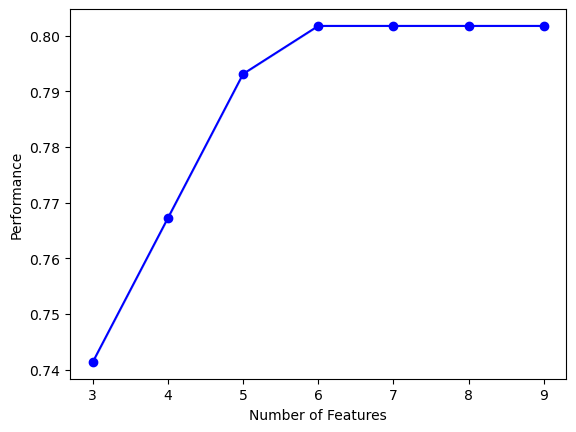

In [48]:
# Plot the accuracy of the model as a function of the number of features
plot_sfs(sbs.get_metric_dict())
plt.show()

# Sequential Forward and Backward Floating Selection

Sequential __forward floating__ selection combines forward and backward selection. It starts with an empty feature set, adds features, and occasionally removes features that don't contribute to model performance.

This hybrid approach aims to strike a balance between forward and backward selection, refining the feature set iteratively.

Sequential __backward floating__ selection is similar to its forward counterpart but begins with all features and occasionally adds or removes them to optimize model performance.
This method seeks to identify the most important features while discarding those that have little impact on the model.

Let's first use __Sequential backward floating__ by setting __forward__ = "False".

In [49]:
sbfs = SFS(lr,
          k_features=3,
          forward=False,
          floating=True,
          scoring='accuracy',
          cv=0)

In [50]:
sbfs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, forward=False, k_features=(3, 3),
                          scoring='accuracy')

In [53]:
sbfs.subsets_

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin',
   'MCP.1')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Adiponectin',
   'Resistin')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age',
   'BMI',
   'Glucose',
   'Insulin',
   'HOMA',
   'Leptin',
   'Resistin')},
 6: {'feature_idx': (0, 1, 2, 3, 5, 7),
  'cv_scores': array([0.80172414]),
  'avg_score': 0.8017241379310345,
  'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')},
 5: {'feature_idx': (0, 1, 2, 3, 7),
  'cv_scores': array([0.79310345]),
  'avg_score': 0.79

In [54]:
print(sbfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Resistin')


In [55]:
print(sbfs.subsets_[3]["avg_score"])

0.7413793103448276


Now, let's use Sequential __forward floating__ by setting __forward__ = "True".

In [56]:
sffs = SFS(lr,
          k_features=3,
          forward= True,
          floating= True,
          scoring='accuracy',
          cv=0)
sffs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, k_features=(3, 3), scoring='accuracy')

In [58]:
sffs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.72413793]),
  'avg_score': 0.7241379310344828,
  'feature_names': ('Glucose',)},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.73275862]),
  'avg_score': 0.7327586206896551,
  'feature_names': ('Age', 'Glucose')},
 3: {'feature_idx': (0, 2, 3),
  'cv_scores': array([0.76724138]),
  'avg_score': 0.7672413793103449,
  'feature_names': ('Age', 'Glucose', 'Insulin')}}

In [59]:
print(sbfs.subsets_[3]['feature_names'])

('Age', 'Glucose', 'Resistin')


In [60]:
print(sbfs.subsets_[3]["avg_score"])

0.7413793103448276


# Recursive Feature Elimination

In the world of feature engineering and dimensionality reduction, Recursive Feature Elimination (RFE) is a powerful technique aimed at selecting the most informative features for machine learning models. RFE operates by systematically removing the least significant features from the dataset, iteratively enhancing model performance. This method offers a structured approach to feature selection and has various practical applications.

__Iterative Elimination:__
* RFE starts with all available features and iteratively removes the least important feature(s) based on a ranking criterion, often calculated using a machine learning model's coefficients or feature importance scores.

__Model-Based Ranking:__
* RFE leverages a machine learning model (e.g., logistic regression, random forest) to rank the importance of features. The model is trained on the dataset with all features, and each feature's significance is assessed based on its contribution to the model's predictive accuracy.

__Recursive Process:__
* Features are eliminated one at a time, and the process continues until a predetermined number of features remains or until model performance stabilizes. The algorithm halts when the optimal subset of features is found.

__Evaluation Metric:__
* The choice of evaluation metric is essential for RFE. Common metrics include accuracy, F1-score, or any suitable measure for the specific problem at hand. The metric guides the elimination process to optimize model performance.

__Benefits of RFE:__

* __Improved Model Efficiency:__ By reducing the number of features, RFE can lead to faster model training and lower computational costs.

* __Enhanced Model Performance:__ Selecting the most relevant features often results in more accurate and interpretable models.

* __Overfitting Mitigation:__ RFE helps prevent overfitting, especially when the original dataset contains noisy or irrelevant features.

* __Feature Importance Insights:__ RFE provides insights into which features are most influential in making predictions.

# Recursive Feature Elimination with scikit-learn

In [63]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [64]:
# Load the data
health = pd.read_csv("data/dataR2.csv")
X = np.array(health.iloc[:,:-1])
y = np.array(health.iloc[:,-1])

In [65]:
# Standardize the data
X = StandardScaler().fit_transform(X)

In [66]:
# Logistic regression model
lr = LogisticRegression(max_iter=1000)

In [69]:
# Recursive feature elimination
rfe = RFE(lr, n_features_to_select=3)

In [70]:
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

# Evaluating the Result of Recursive Feature Elimination

In [72]:
# Load the data
health = pd.read_csv("data/dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

In [73]:
# Create a list of feature names
feature_list = list(X.columns)

In [74]:
# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [75]:
# List of features chosen by recursive feature elimination
rfe_features = [f for (f, support) in zip(feature_list, rfe.support_) if support]

In [76]:
print(rfe.score(X, y))

0.7327586206896551


In [79]:
# features chosen by recursive feature elimination
print(rfe_features)

['BMI', 'Glucose', 'Resistin']


In [80]:
# list of feature names
print(feature_list)

['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']


In [77]:
print(rfe.ranking_)

[4 1 1 2 3 5 7 1 6]


In [78]:
print(rfe.support_)

[False  True  True False False False False  True False]


The breast cancer data for this lesson were taken from the UCI Machine Learning Repository. [Patricio, 2018] Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).